# Red Neuronal con fastai

In [1]:
  !curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [2]:
"""
Si el proyecto se corre en colab:
"""
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = '/content/gdrive/My Drive/TecnologíasEmergentes_Eq3/'
base_dir = root_dir + 'fastai-v3/'
project_base_dir = root_dir + 'images/'

"""
 Si se corre el proyecto localmente:
"""
#project_base_dir = 'images/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [9]:
!ls gdrive/My\ Drive/TecnologíasEmergentes_Eq3/images/models

stage-1-50.pth	tmp.pth


In [0]:
%matplotlib inline

We import all the necessary packages. We are going to work with the [fastai V1 library](http://www.fast.ai/2018/10/02/fastai-ai/) which sits on top of [Pytorch 1.0](https://hackernoon.com/pytorch-1-0-468332ba5163). The fastai library provides many useful functions that enable us to quickly and easily build neural networks and train our models.

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

In [0]:
bs = 64

In [0]:
data = ImageDataBunch.from_folder(project_base_dir, ds_tfms=get_transforms(), bs=bs//2, test='test')

In [29]:
data

ImageDataBunch;

Train: LabelList (5108 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
caballo2,caballo2,caballo2,caballo2,caballo2
Path: /content/gdrive/My Drive/TecnologíasEmergentes_Eq3/images;

Valid: LabelList (1000 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
caballo2,caballo2,caballo2,caballo2,caballo2
Path: /content/gdrive/My Drive/TecnologíasEmergentes_Eq3/images;

Test: LabelList (1 items)
x: ImageList
Image (3, 224, 224)
y: EmptyLabelList

Path: /content/gdrive/My Drive/TecnologíasEmergentes_Eq3/images

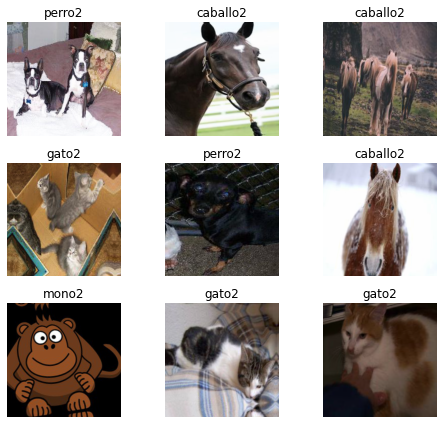

In [17]:
data.show_batch(rows = 3, figsize=(7,6))

In [20]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


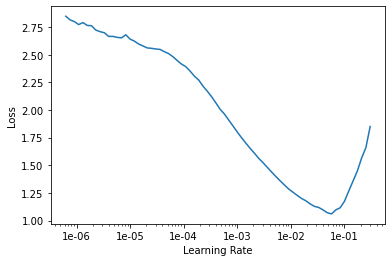

In [0]:
# Se trata de identificar cuál es el learning rate que da mejores resultados.
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,0.180899,0.447272,0.101000,05:19
1,0.139445,0.375054,0.092000,01:26
2,0.097048,0.369665,0.074000,01:27
3,0.097852,0.354119,0.080000,01:27
4,0.055897,0.442723,0.098000,01:26
5,0.047959,0.323785,0.071000,01:26
6,0.032661,0.312653,0.071000,01:26
7,0.022804,0.404973,0.088000,01:26


In [0]:
#Se guardan los pesos de la red.
learn.save('stage-1-50')

In [0]:
learn = learn.load(project_base_dir + '/models'+ '/stage-1-50')

In [0]:
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=slice(1e-6,1e-2))

epoch,train_loss,valid_loss,error_rate,time
0,0.303466,0.498053,0.107000,01:55
1,0.146849,0.346633,0.091000,01:55
2,0.071398,0.225255,0.073000,01:55


In [24]:
interp = ClassificationInterpretation.from_learner(learn)

In [25]:
interp.most_confused(min_val=2)

[('caballo2', 'mono2', 55),
 ('caballo2', 'turtle2', 20),
 ('caballo2', 'perro2', 8)]

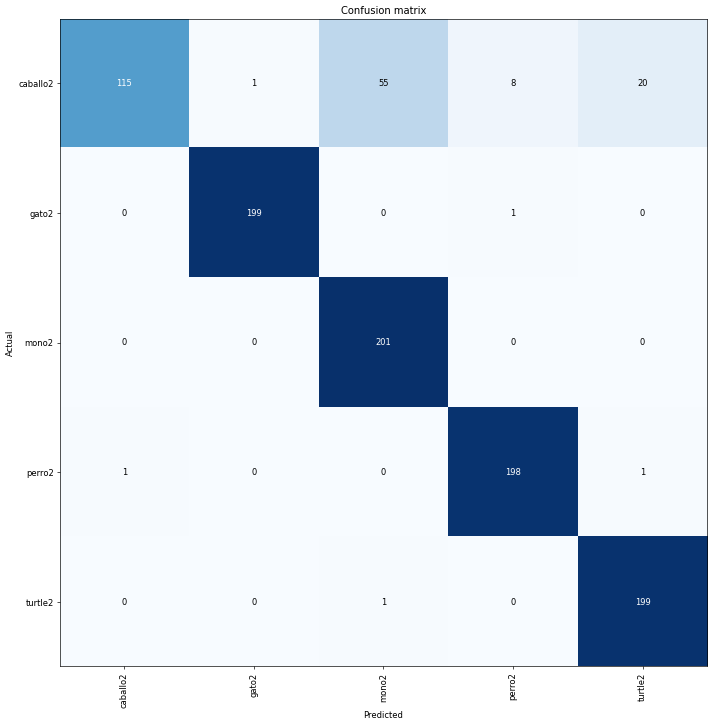

In [26]:
interp.plot_confusion_matrix(figsize =(12, 12), dpi = 60)

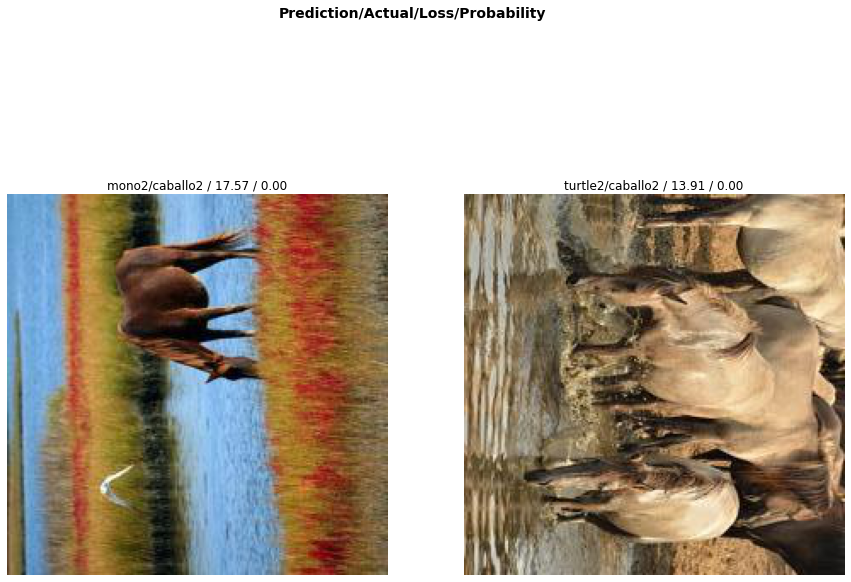

In [27]:
interp.plot_top_losses(2, figsize=(15,11))

# Predicción

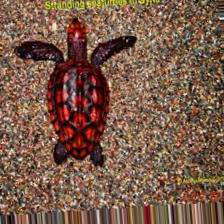

In [32]:
img = data.test_ds[0][0]
img

In [0]:
pred = learn.predict(img)

In [40]:
pred

(Category tensor(4),
 tensor(4),
 tensor([4.8913e-07, 4.8319e-05, 7.1661e-07, 5.5691e-04, 9.9939e-01]))

In [44]:
classList = learn.data.classes
classList

['caballo2', 'gato2', 'mono2', 'perro2', 'turtle2']

In [47]:
categoryIdx = pred[1].item()
probs = pred[2].numpy()

print("Las predicciones de la imagen son: ")

for idx in range(len(classList)):
  print(classList[idx] + ': ' + str(probs[idx]))

print("La imagen fue categorizada como: " + classList[categoryIdx])

Las predicciones de la imagen son: 
caballo2: 4.891322e-07
gato2: 4.8319354e-05
mono2: 7.166065e-07
perro2: 0.0005569079
turtle2: 0.9993936
La imagen fue categorizada como: turtle2
